# Analisi di 48 ore della simulazione

Il dataset utilizzato sarà **CityLearn Challenge 2023**, analizzeremo le azioni effettuate da un agente SAC con il reward Solar Penalty and Comfort Reward, per esaltare le caratteristiche e le problematiche di questa tipologia di approccio. Verrano considerate 48 ore della simulazione per vedere come l'agente nello specifico si comporta e valutare la correttezza di questo comportamento. 
Dalle valutazioni precedenti si evince che tra tutti i reward, il seguente, risulta il più performante, ma si possono evidenziare comunque delle problematiche.

----

**Lista degli import**

In [1]:
from citylearn.agents.sac import SAC as Agent
from citylearn.citylearn import CityLearnEnv
from citylearn.wrappers import *

# Importo reward 
from rewards.CityLearnReward import SolarPenaltyAndComfortReward

#import per strutture dati
import pandas as pd
from datetime import datetime

#import per grafici
from IPython.display import display, Markdown

#permette di nascondere i warning
import warnings
warnings.filterwarnings("ignore")


Couldn't import dot_parser, loading of dot files will not be possible.


## **Funzioni di plotting dedicate**


Vengono create delle funzioni per il plotting differenti per evitare problemi di ridimensionamento del grafico.


In [2]:
from typing import List
#import per grafici
import matplotlib.pyplot as plt
import mplcursors

def plot_single_agent(agent_data, ylabel, title, label='Agent'):
    """
    Funzione per visualizzare i risultati di un singolo agente RBC.
    agent_data: array di dati per l'agente.
    ylabel: Etichetta dell'asse y.
    title: Titolo del grafico.
    label: Nome dell'agente da visualizzare.
    """
    plt.figure(figsize=(12, 8))
    steps = range(len(agent_data))
    
    plt.plot(steps, agent_data, label=label, color='tab:red', alpha=0.9)
    
    plt.xlabel('Step')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    plt.xticks(steps[::1], rotation=45)
    plt.tight_layout()
    plt.show()

def plot_comparison_two(agent_data1, agent_data2, ylabel, title, label1='Agent 1', label2='Agent 2'):
    """
    Funzione per comparare i risultati di due agenti RBC.
    agent_data1, agent_data2: array di dati per i due agenti.
    ylabel: Etichetta dell'asse y.
    title: Titolo del grafico.
    label1, label2: Nomi degli agenti da confrontare.
    """
    plt.figure(figsize=(12, 8))
    steps = range(len(agent_data1))
    
    plt.plot(steps, agent_data1, label=label1, color='tab:blue', alpha=0.8)
    plt.plot(steps, agent_data2, label=label2, color='tab:red', alpha=0.8)
    
    plt.xlabel('Step')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    plt.xticks(steps[::1], rotation=45)
    plt.tight_layout()
    plt.show()

In [3]:
# Inizializza l'ambiente
env = CityLearnEnv('citylearn_challenge_2023_phase_3_3', central_agent=True)
env.random_seed=0

# Imposto un nuovo reward, rispetto a quello impostato di default
rf = SolarPenaltyAndComfortReward(env.schema, coefficients=(0.8,0.3))
env.reward_function = rf

# Imposto l'agente
model = Agent(env)
model.random_seed=0

# Imposto l'edificio di confronto e quanti episodi vengono effettuati dagli agenti
num_building = 0
num_episodes = 10

# Reset
observations, _ = env.reset()

# Training sull'ambiente
model.learn(episodes=num_episodes, deterministic_finish=True)





----

## **Confronto con Baseline**

In questa simulazione vengono esclusivamente confrontato il seguente algoritmo SAC. I risultati risultano equivalente alla simulazione completa, perciò non serve approfondire troppo in questo documento.


In [4]:
# Vengono filtrare le cost_function desiderate
kpis_names = { 'electricity_consumption_total':'Consumo totale della rete',
               'carbon_emissions_total':'Emissioni',
              'discomfort_proportion':'Proporzione del tempo fuori dal comfort',
              'daily_peak_minus_load_factor_average': 'Misura dell inefficenza nell uso giornaliero della potenza disponibile',
              'daily_peak_average': 'Picco medio giornaliero',
              'all_time_peak_average': 'picco massimo dei consumi nel distretto',
              'one_minus_thermal_resilience_proportion': 'Discomfort proportion in interruzioni elettriche',
              'power_outage_normalized_unserved_energy_total': 'domanda non soddisfatta a causa di carenza di energia',
              'ramping_average': 'differenza media tra consumo al timestep corrente al precedente ',
              #Qua si aggiungono cost_function
}

display(Markdown(f"### **SAC - Base Version**"))
display(Markdown("----"))

kpis = env.evaluate()
kpis = kpis[(kpis['cost_function'].isin(kpis_names))].dropna()
kpis = kpis.pivot(index='cost_function', columns='name', values='value').round(3)
display(kpis)



### **SAC - Base Version**

----

name,Building_1,Building_2,Building_3,Building_4,Building_5,Building_6,District
cost_function,,,,,,,
all_time_peak_average,NaN,NaN,NaN,NaN,NaN,NaN,0.836
carbon_emissions_total,0.765,0.906,0.832,0.804,0.921,0.768,0.833
daily_peak_average,NaN,NaN,NaN,NaN,NaN,NaN,0.833
discomfort_proportion,0.207,0.155,0.160,0.041,0.257,0.230,0.175
electricity_consumption_total,0.766,0.905,0.832,0.805,0.922,0.764,0.832
one_minus_thermal_resilience_proportion,0.970,0.842,1.000,0.576,0.913,0.758,0.843
power_outage_normalized_unserved_energy_total,0.654,0.647,0.585,0.665,0.728,0.657,0.656
ramping_average,NaN,NaN,NaN,NaN,NaN,NaN,0.920



------

## **Comportamento dei consumi**

Nel seguente grafico, in blu è rappresentato il **net_electricity_consumption**, ovvero i consumi totali dell'edificio. In rosso, invece, abbiamo il **net_electricity_consumption_without_storage_and_pv**, che corrisponde al precedente sottraendo l’energia utilizzata o restituita dalle batterie e di quella generata dai pannelli solari.
Si può osservare come i consumi rossi siano generalmente più elevati, poiché viene ignorata l’autosufficienza dell’edificio, mentre nel caso del blu è possibile anche scendere sotto lo zero, restituendo energia alla rete.

Questo grafico da solo non permette di comprendere a fondo del comportamento dell'agente, ma se affiancato con i grafici successivi può permettere di comprendere meglio le inefficienze dell'algoritmo.
Analizzando l’andamento dei consumi, è possibile individuare periodi di inefficienza semplicemente osservando il grafico. Sebbene non sia immediato comprenderne le conseguenze, si nota che in alcuni punti il grafico blu (che rappresenta i consumi considerando l’autosufficienza) supera quello rosso (che indica i consumi totali dei dispositivi). Questo suggerisce che l’agente ha accumulato energia anche in momenti in cui la casa non era autosufficiente, causando un aumento dei picchi di prelievo dalla rete. Si evidenzia inoltre che questa inefficienza avviene durante la notte, dove sappiamo che non avviene alcun tipo di produzione di energia.

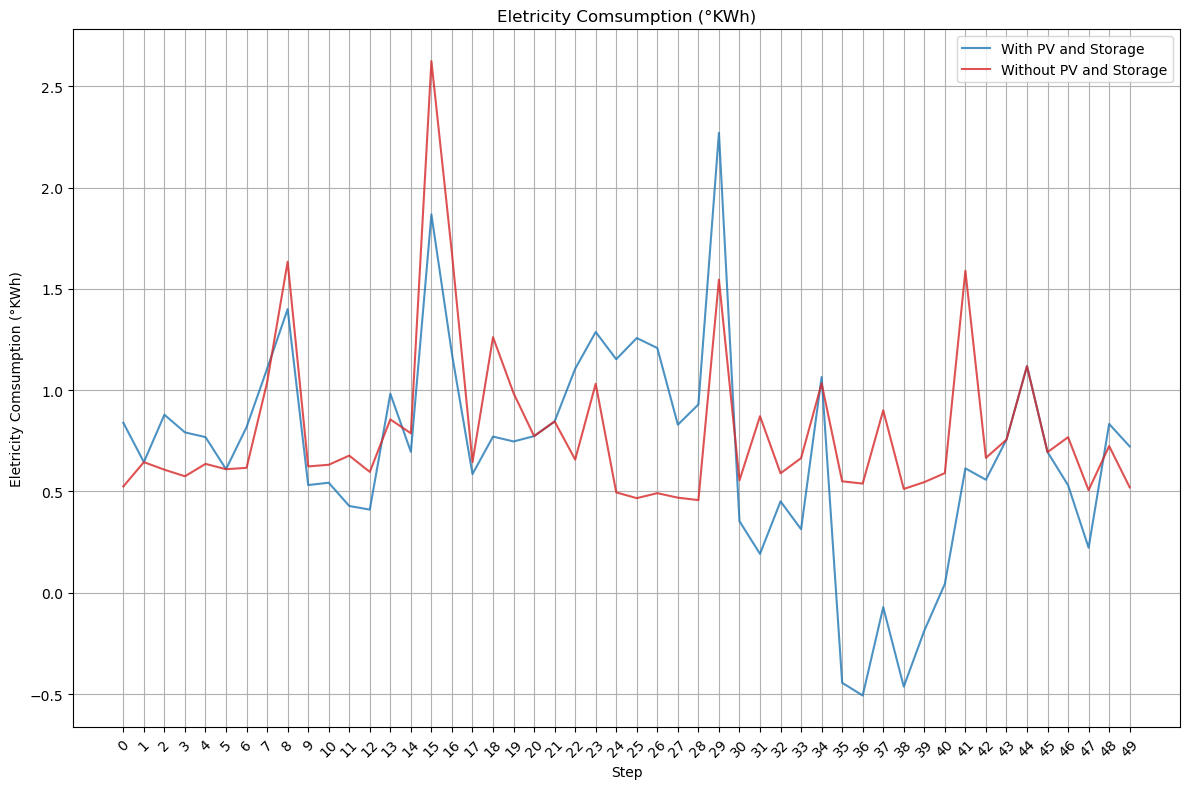

In [5]:
#Calcola il consumo di elettricità totale dell'edificio
energy_with_pv= env.unwrapped.buildings[num_building].net_electricity_consumption
energy_without_pv = env.unwrapped.buildings[num_building].net_electricity_consumption_without_storage_and_pv

plot_comparison_two(
    energy_with_pv[48:98],
    energy_without_pv[48:98],
    ylabel='Eletricity Comsumption (°KWh)',
    title='Eletricity Comsumption (°KWh)',
    label1='With PV and Storage',
    label2='Without PV and Storage'
)

Di seguito vengono visualizzati i consumi dei carichi essenziali, che sono dei consumi fissi. Qui l'agente non può effettuare alcuna modifica (in caso di blackout invece si), ma viene visualizzato per completezza. 

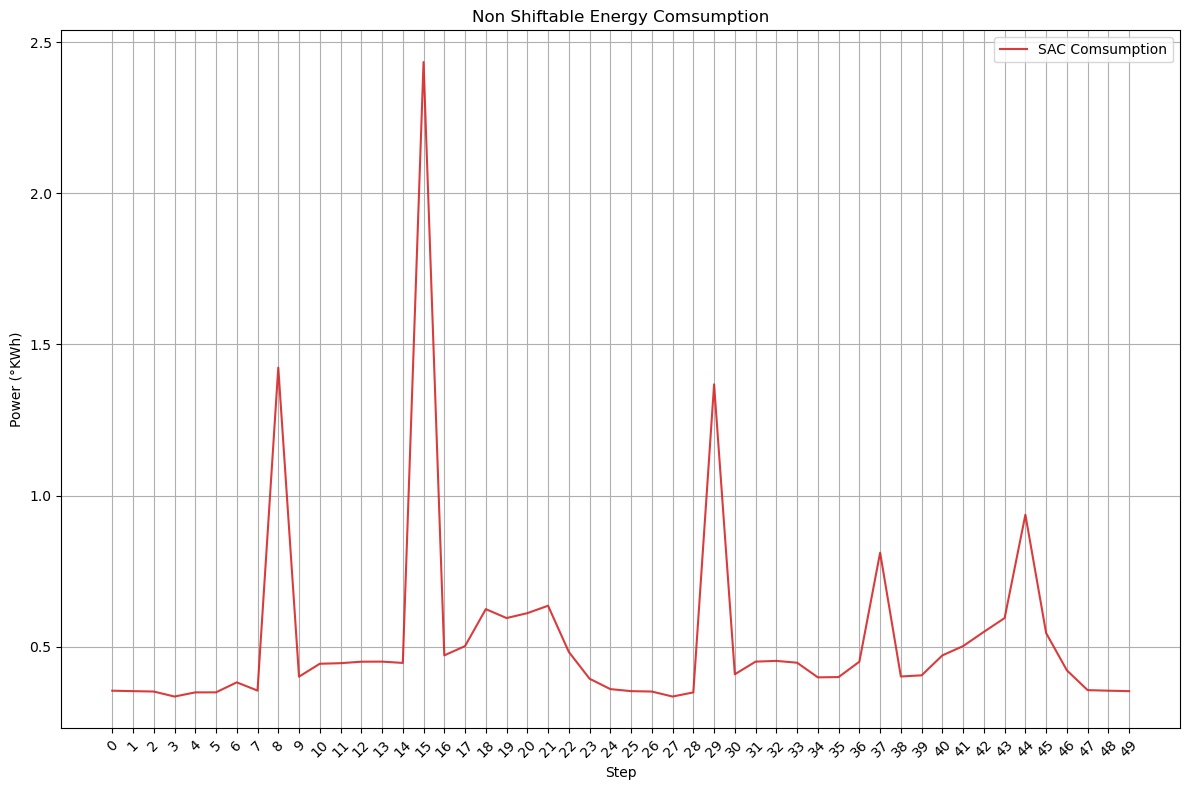

In [6]:

non_energy_sac = env.unwrapped.buildings[num_building].non_shiftable_load_electricity_consumption

plot_single_agent(
    non_energy_sac[48:98],
    ylabel='Power (°KWh)',
    title='Non Shiftable Energy Comsumption',
    label='SAC Comsumption',

)


------

## **Comportamento delle temperature**

Di seguito sono mostrate le temperature e i consumi dei dispositivi di raffreddamento (utili a comprenderne l'utilizzo che ne fa l'agente).
Considerando che la temperatura di setpoint si aggira generalmente sui 24.5°C, escludendo qualche variazione, si può considerare il comportamento dell'agente generalmente buono. Infatti i livelli di discomfort sono bassi, e si può vedere anche nel grafico delle temperature come la temperatura interna sia stabile.
Per quanto riguarda la gestione della temperatura, il grafico della temperatura interna appare relativamente stabile intorno al setpoint, rimanendo sempre all’interno della banda consentita. Le variazioni osservate sono dovute esclusivamente ai cambiamenti del setpoint, che causano le oscillazioni nel grafico.
È evidente come queste variazioni di setpoint comportino bruschi cambiamenti nei consumi dei dispositivi di raffreddamento (come allo step 47), generando picchi e fenomeni di ramping. Un approccio più graduale nell'adattamento del setpoint potrebbe comportare un leggero aumento della discomfort proportion, ma permetterebbe una significativa riduzione di picchi e ramping nei consumi. Va comunque sottolineato che si tratta di una scelta soggettiva, legata alle preferenze dell’utente.
Si riscontrano tuttavia alcune imprecisioni nel comportamento dell’agente. Ad esempio, dallo step 27 si nota un incremento graduale del setpoint, mentre i consumi mostrano forti oscillazioni, invece di seguire in modo coerente l’andamento del setpoint stesso, comportando consumi aggiuntivi evitabili. Questo comportamento si riscontra anche in altri momenti della simulazione.

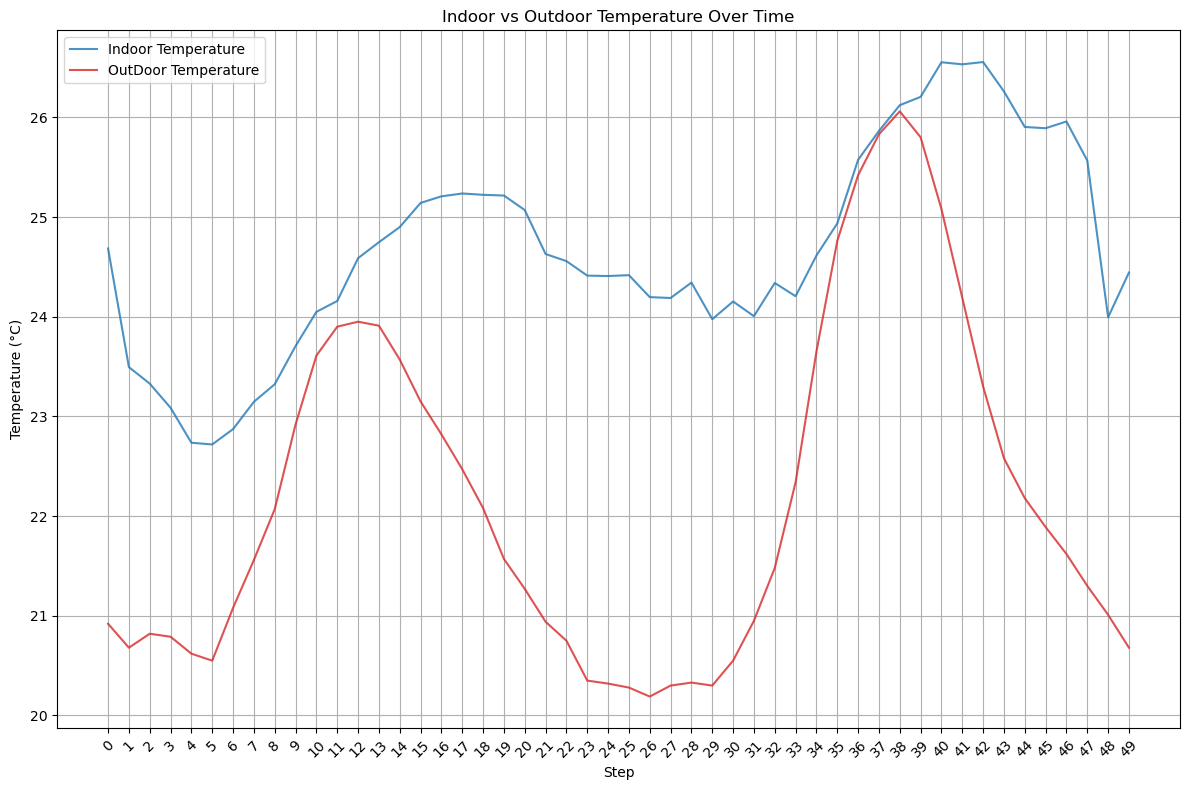

In [7]:
indoor_base_temp = env.unwrapped.buildings[num_building].indoor_dry_bulb_temperature
outdoor_temp = env.unwrapped.buildings[num_building].weather.outdoor_dry_bulb_temperature


plot_comparison_two(
    indoor_base_temp[48:98],
    outdoor_temp[48:98],
    ylabel='Temperature (°C)',
    title='Indoor vs Outdoor Temperature Over Time',
    label1='Indoor Temperature',
    label2='OutDoor Temperature'
)


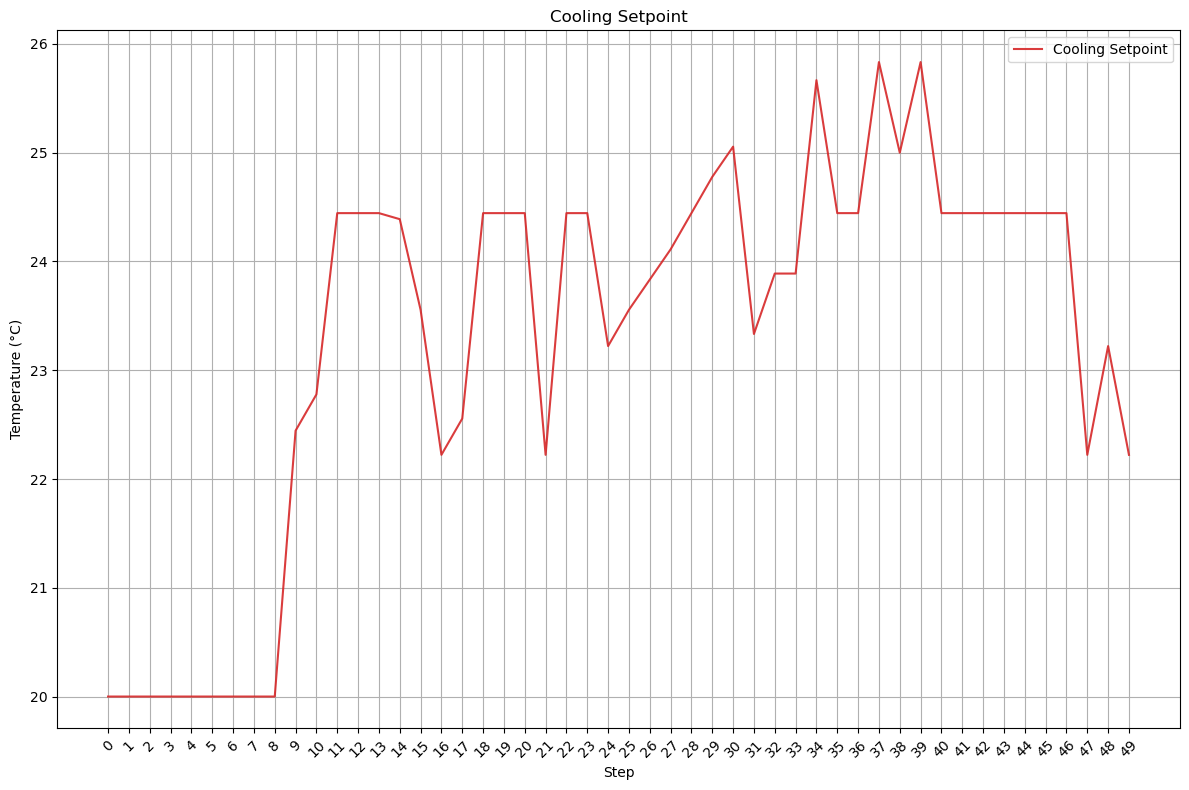

In [8]:
plot_single_agent(
    agent_data=env.buildings[num_building].indoor_dry_bulb_temperature_cooling_set_point[48:98],
    ylabel='Temperature (°C)',
    title='Cooling Setpoint',
    label='Cooling Setpoint'
)

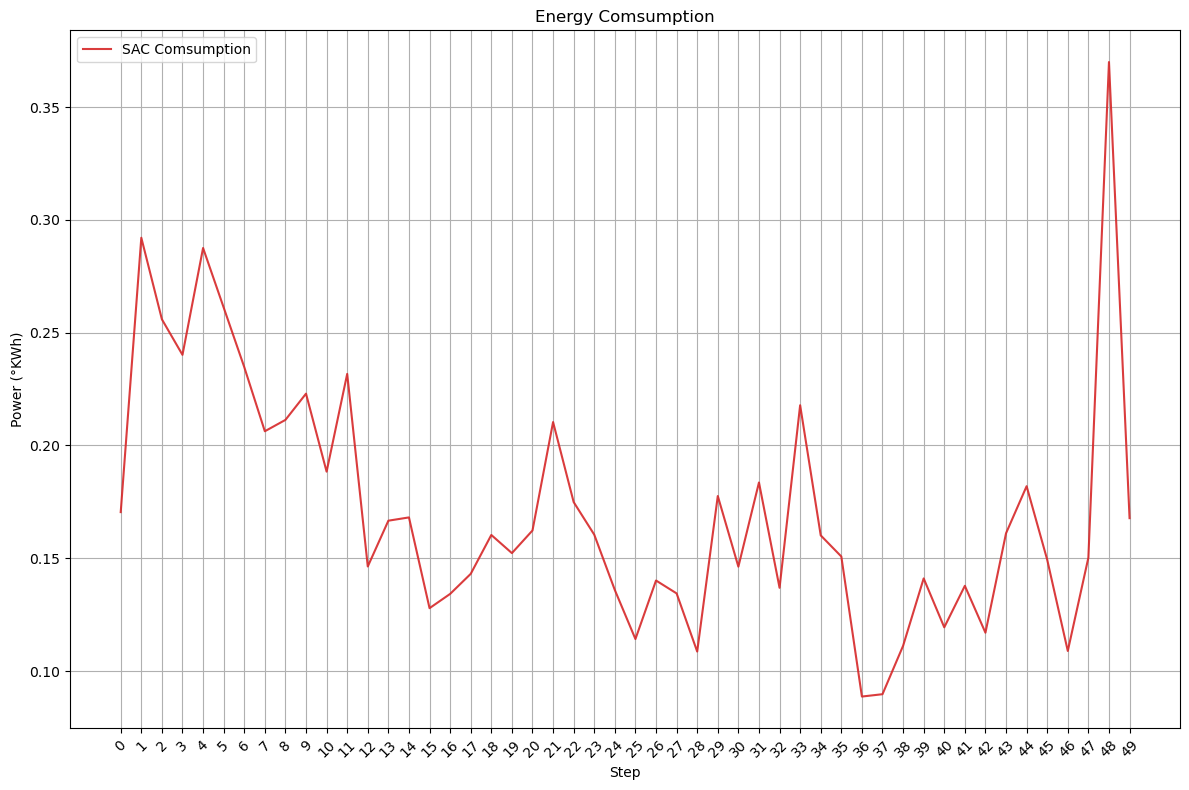

In [9]:
#Questa componente estrae la potenza utilizzata dei dispositivi che servono per regolare la temperatura ambientale

cooler_energy_sac = env.unwrapped.buildings[num_building].cooling_electricity_consumption

plot_single_agent(
    cooler_energy_sac[48:98],
    ylabel='Power (°KWh)',
    title='Energy Comsumption',
    label='SAC Comsumption',

)


----

## **Comportamento nell'utilizzo delle batterie**

Si osserva come l’accumulo eccessivo nella batteria abbia contribuito all’inefficienza rilevata. In particolare, si nota un comportamento poco ottimale dell’agente: durante un momento di produzione solare, la batteria viene prima svuotata e poi nuovamente caricata. Questo indica che l’agente non è ancora sufficientemente addestrato a gestire in modo ottimale l’accumulo energetico, tendendo a esagerare e generando consumi evitabili.
Inoltre, l’accumulo – anche nei momenti in cui sarebbe sensato – inizia sistematicamente uno step dopo rispetto alla generazione solare. Questo suggerisce che l’agente non ha capacità predittive, e che potrebbe trarre beneficio dall’integrazione di un modello di previsione.
Si segnala infine un rilascio consistente allo step 47 che, sebbene eccessivo, risulta efficace per ridurre i consumi notturni. In generale, tuttavia, l’accumulo appare irregolare e poco coerente con le esigenze energetiche effettive, portanSi osserva come l’accumulo eccessivo nella batteria abbia contribuito all’inefficienza rilevata. In particolare, si nota un comportamento poco ottimale dell’agente: durante un momento di produzione solare, la batteria viene prima svuotata e poi nuovamente caricata. Questo indica che l’agente non è ancora sufficientemente addestrato a gestire in modo ottimale l’accumulo energetico, tendendo a esagerare e generando consumi evitabili.
Inoltre, l’accumulo – anche nei momenti in cui sarebbe sensato – inizia sistematicamente uno step dopo rispetto alla generazione solare. Questo suggerisce che l’agente non ha capacità predittive, e che potrebbe trarre beneficio dall’integrazione di un modello di previsione.
Si segnala infine un rilascio consistente allo step 47 che, sebbene eccessivo, risulta efficace per ridurre i consumi notturni. In generale, tuttavia, l’accumulo appare irregolare e poco coerente con le esigenze energetiche effettive.

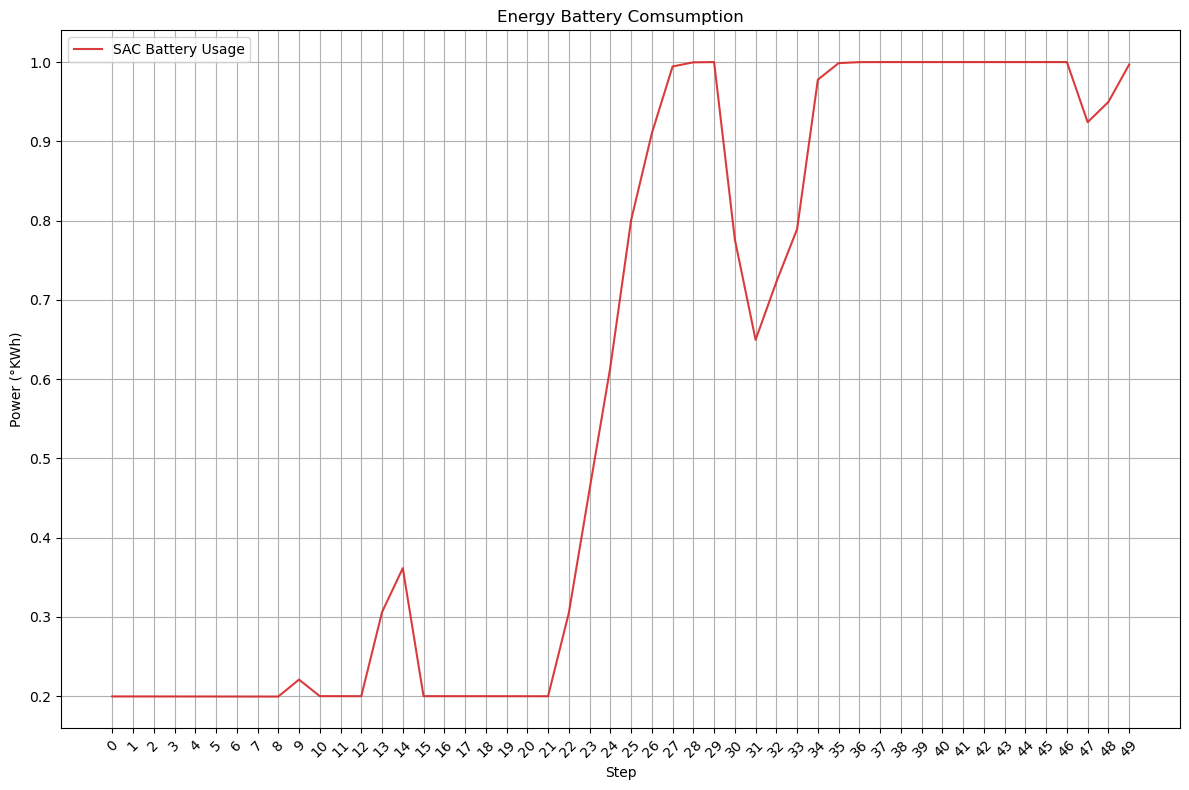

In [10]:
agent_data1 = env.unwrapped.buildings[num_building].electrical_storage.soc

plot_single_agent(
    agent_data1[48:98],
    ylabel='Power (°KWh)',
    title='Energy Battery Comsumption',
    label='SAC Battery Usage'
)

L’**accumulatore DHW** mostra un comportamento più regolare rispetto alla batteria elettrica, ma ciò non si traduce necessariamente in maggiore efficienza. Si osserva, ad esempio, che durante il primo giorno l’accumulo avviene principalmente nelle ore diurne, riducendo così il margine disponibile per sfruttare la produzione solare tramite la batteria elettrica. In questo scenario, sarebbe stato più opportuno accumulare prima energia nella batteria e successivamente soddisfare i bisogni del DHW.
Inoltre, si nota un rilascio serale da parte dell’accumulatore DHW, seguito da un nuovo accumulo intorno allo step 26, corrispondente alle 2 di notte. Come suggerito anche dal vincitore della CityLearn Challenge, una strategia ottimale prevederebbe l’accumulo del DHW durante le ore notturne, in modo da alleggerire il carico sulla rete, oppure solamente nei casi in cui la batteria elettrica sia già completamente carica.
L’attuale strategia, invece, tende ad aumentare i picchi di carico e i consumi prelevati dalla rete. Adottando l’approccio proposto dal vincitore della challenge, si potrebbero migliorare queste criticità e ottenere un comportamento energetico più efficiente. Inoltre c'è da considerare che durante una fase di blackout il suo comportamento rimane invariato, rubando disponibilità energia a dispositivi più essenziali. Con l'attuale algoritmo SAC ciò non risulta ancora risolvibile.

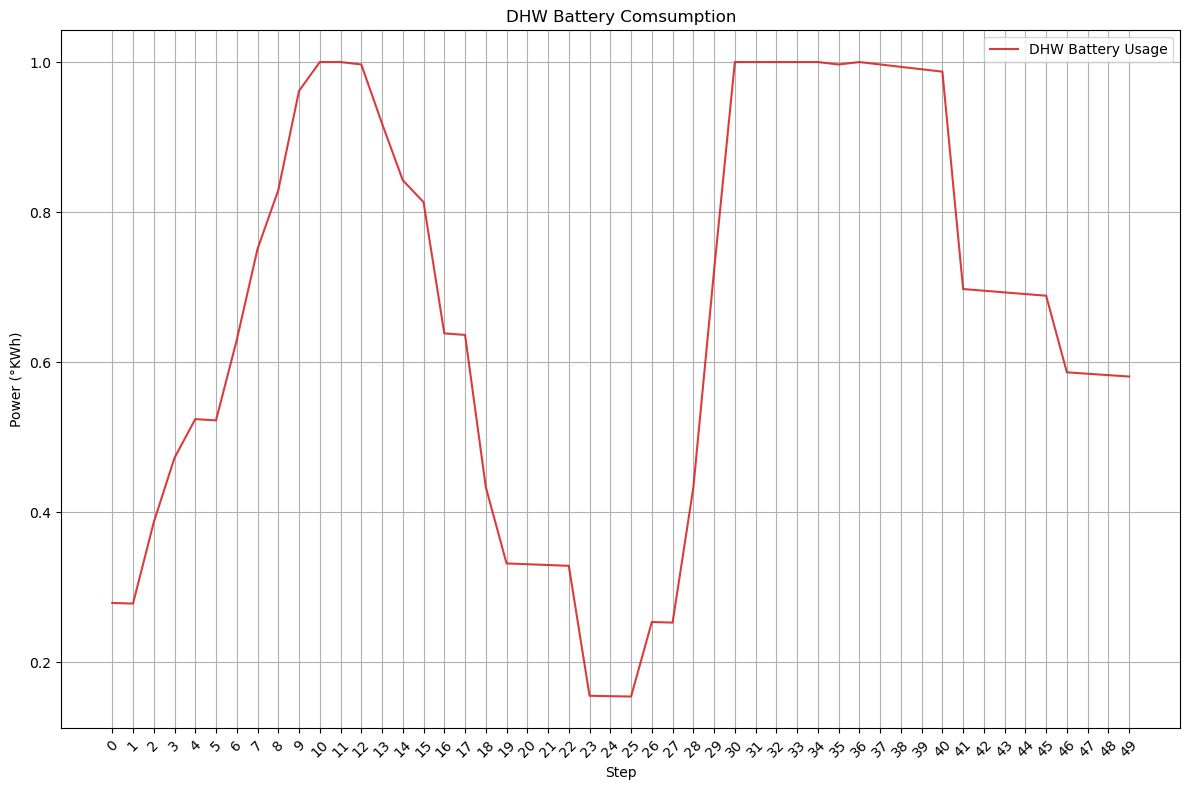

In [11]:
agent_data1 = env.unwrapped.buildings[num_building].dhw_storage.soc

plot_single_agent(
    agent_data1[48:98],
    ylabel='Power (°KWh)',
    title='DHW Battery Comsumption',
    label='DHW Battery Usage'
)


----

## **Comportamento delle emissioni**

L'emissioni sono strettamente legate ai consumi di energia della rete, perciò le caratteristiche precedenti si propagano anche qua.

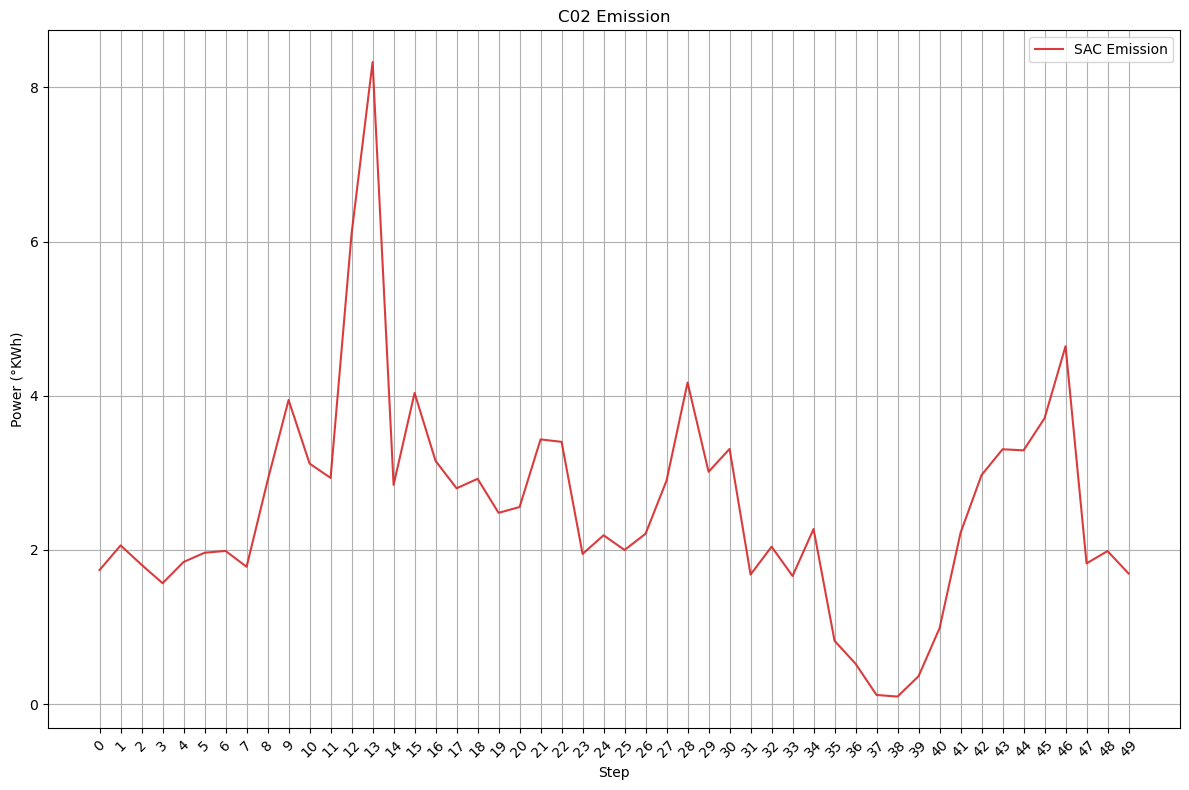

In [12]:
agent_data1 = env.unwrapped.net_electricity_consumption_emission


plot_single_agent(
    agent_data1[48:98],
    ylabel='Power (°KWh)',
    title='C02 Emission',
    label='SAC Emission'
)

Nel complesso, sebbene l’agente mostri prestazioni relativamente buone, sono presenti alcune imprecisioni che potrebbero essere facilmente corrette. Va inoltre considerato che i risultati positivi ottenuti potrebbero essere il frutto di un overfitting sul contesto specifico della simulazione, il che rischierebbe di compromettere l’efficacia dell’agente in scenari reali o meno controllati.